<a href="https://colab.research.google.com/github/ahmadshajhan/Ahmad/blob/main/03_intoduction_to_computer_vision_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# introduction to Convolutional Neural Network and Compurt Vision with TensorFlow

###Get the data

In [ ]:
import os
import zipfile

# 1. Download the dataset using the UPDATED URL
!wget --no-check-certificate \
    https://download.mlcc.google.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/cats_and_dogs_filtered.zip

# 2. Extract the zip file
local_zip = '/content/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

# 3. Define the directory paths
base_dir = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'validation')

print(f"Dataset extracted to: {base_dir}")
print("Classes inside train folder:", os.listdir(train_dir))

--2026-02-27 20:28:13--  https://download.mlcc.google.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving download.mlcc.google.com (download.mlcc.google.com)... 173.194.212.94, 2607:f8b0:400c:c11::5e
Connecting to download.mlcc.google.com (download.mlcc.google.com)|173.194.212.94|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.google.com/mlcc/mledu-datasets/cats_and_dogs_filtered.zip [following]
--2026-02-27 20:28:13--  https://dl.google.com/mlcc/mledu-datasets/cats_and_dogs_filtered.zip
Resolving dl.google.com (dl.google.com)... 142.250.98.93, 142.250.98.91, 142.250.98.190, ...
Connecting to dl.google.com (dl.google.com)|142.250.98.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/cats_and_dogs_filtered.zip’

/content/cats_and_d 100%[===================>]  65.43M   165MB/s    in 0.4s    

2026-02-27 20:28:13 (165 MB/s) - ‘/content/cats_and_dogs_filtered.zip’ s

In [ ]:
! ls cats_and_dogs_filtered

train  validation  vectorize.py


In [ ]:
! ls cats_and_dogs_filtered/train

cats  dogs


In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("cats_and_dogs_filtered"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}.")

There are 2 directories and 1 images in 'cats_and_dogs_filtered.
There are 2 directories and 0 images in 'cats_and_dogs_filtered/train.
There are 0 directories and 1000 images in 'cats_and_dogs_filtered/train/dogs.
There are 0 directories and 1000 images in 'cats_and_dogs_filtered/train/cats.
There are 2 directories and 0 images in 'cats_and_dogs_filtered/validation.
There are 0 directories and 500 images in 'cats_and_dogs_filtered/validation/dogs.
There are 0 directories and 500 images in 'cats_and_dogs_filtered/validation/cats.


In [ ]:
!ls -la cats_and_dogs_filtered

total 20
drwxr-xr-x 4 root root 4096 Feb 27 20:28 .
drwxr-xr-x 1 root root 4096 Feb 27 20:28 ..
drwxr-xr-x 4 root root 4096 Feb 27 20:28 train
drwxr-xr-x 4 root root 4096 Feb 27 20:28 validation
-rw-r--r-- 1 root root  140 Feb 27 20:28 vectorize.py


In [ ]:
# Anotehr way to find how may images are in file
num_dog_image_train = len(os.listdir('cats_and_dogs_filtered/train/dogs'))
num_dog_image_train

1000

In [ ]:
num_cat_image_train = len(os.listdir('cats_and_dogs_filtered/train/cats'))
num_cat_image_train

1000

To visualize our images , first let's get the classes names programmatically

In [ ]:
import pathlib
import numpy as np

data_dir = pathlib.Path("cats_and_dogs_filtered/train/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['cats' 'dogs']


In [ ]:
# Lets's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os # Import os module for path joining

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = os.path.join(target_dir, target_class) # Use os.path.join for correct path construction
  print(target_folder)

  # Get a random image path
  random_image  = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplot lib
  img = mpimg.imread(os.path.join(target_folder, random_image[0])) # Use os.path.join here too
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");
  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

cats_and_dogs_filtered/train/dogs
['dog.225.jpg']
Image shape: (375, 499, 3)


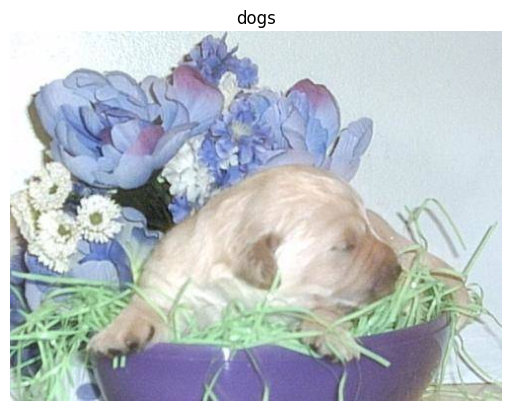

In [ ]:
# View random image from the training dataset
img = view_random_image(target_dir="cats_and_dogs_filtered/train/",
                        target_class="dogs")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(375, 499, 3), dtype=uint8, numpy=
array([[[254, 255, 255],
        [254, 255, 255],
        [254, 255, 255],
        ...,
        [205, 214, 223],
        [205, 213, 224],
        [205, 213, 224]],

       [[253, 254, 255],
        [253, 254, 255],
        [254, 255, 255],
        ...,
        [205, 214, 223],
        [205, 213, 224],
        [205, 213, 224]],

       [[252, 253, 255],
        [252, 253, 255],
        [253, 254, 255],
        ...,
        [205, 214, 223],
        [205, 213, 224],
        [205, 213, 224]],

       ...,

       [[236, 247, 243],
        [222, 233, 229],
        [203, 216, 209],
        ...,
        [188, 197, 178],
        [185, 197, 175],
        [184, 196, 174]],

       [[242, 253, 249],
        [236, 247, 243],
        [221, 234, 227],
        ...,
        [188, 197, 178],
        [185, 197, 175],
        [184, 196, 174]],

       [[247, 255, 254],
        [243, 254, 250],
        [231, 244, 237],
        ...,
        [193, 202, 18

In [ ]:
img.shape

(375, 499, 3)

In [ ]:
# Get all the pxel values b/w 0 & 1
img/255.

array([[[0.99607843, 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        [0.99607843, 1.        , 1.        ],
        ...,
        [0.80392157, 0.83921569, 0.8745098 ],
        [0.80392157, 0.83529412, 0.87843137],
        [0.80392157, 0.83529412, 0.87843137]],

       [[0.99215686, 0.99607843, 1.        ],
        [0.99215686, 0.99607843, 1.        ],
        [0.99607843, 1.        , 1.        ],
        ...,
        [0.80392157, 0.83921569, 0.8745098 ],
        [0.80392157, 0.83529412, 0.87843137],
        [0.80392157, 0.83529412, 0.87843137]],

       [[0.98823529, 0.99215686, 1.        ],
        [0.98823529, 0.99215686, 1.        ],
        [0.99215686, 0.99607843, 1.        ],
        ...,
        [0.80392157, 0.83921569, 0.8745098 ],
        [0.80392157, 0.83529412, 0.87843137],
        [0.80392157, 0.83529412, 0.87843137]],

       ...,

       [[0.9254902 , 0.96862745, 0.95294118],
        [0.87058824, 0.91372549, 0.89803922],
        [0.79607843, 0

## An end-to-end example


Let's build a con neural network to find patterns

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                          target_size=(224, 224),
                                               batch_size=32,
                                          class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                          target_size=(224, 224),
                                               batch_size=32,
                                          class_mode="binary",
                                               seed=42)
#Build a CNN model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our modle
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])
# Fit the modle
history = model_1.fit(train_data,
                      epochs=10,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 184ms/step - accuracy: 0.5063 - loss: 0.7186 - val_accuracy: 0.5350 - val_loss: 0.6694
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.6044 - loss: 0.6474 - val_accuracy: 0.6620 - val_loss: 0.6099
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 111ms/step - accuracy: 0.7142 - loss: 0.5721 - val_accuracy: 0.6650 - val_loss: 0.5841
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.7751 - loss: 0.4833 - val_accuracy: 0.6550 - val_loss: 0.6254
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 109ms/step - accuracy: 0.8250 - loss: 0.3886 - val_accuracy: 0.7000 - val_loss: 0.6448
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.8903 - loss: 0.2800 - val_accuracy: 0.6690 - val_loss: 0.6569
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.9180 - loss: 0.2119 - val_accuracy: 0.6730 - val_loss: 0.8085
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.9579 - loss: 0.1361 - val_accuracy: 0.6670 - val_los

##Using the same model

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model to replicate the tensor flow palyground
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )
history_2 = model_2.fit(train_data, epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 143ms/step - accuracy: 0.4749 - loss: 0.6953 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - accuracy: 0.4910 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.4805 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.4906 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.5074 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.4930 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.4741 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 90ms/step - accuracy: 0.5100 - loss: 0.6931 - val_accuracy: 0.5000 - val_lo

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_3.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_3 = model_3.fit(train_data
                        ,epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 129ms/step - accuracy: 0.4906 - loss: 9.3352 - val_accuracy: 0.5300 - val_loss: 0.7635
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.5126 - loss: 1.3038 - val_accuracy: 0.5270 - val_loss: 0.8442
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - accuracy: 0.5058 - loss: 1.3498 - val_accuracy: 0.5000 - val_loss: 0.9280
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.5490 - loss: 0.7690 - val_accuracy: 0.5500 - val_loss: 0.6918
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.6335 - loss: 0.6324 - val_accuracy: 0.5800 - val_loss: 0.6863


In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Binary classification lets's break it Down

cats_and_dogs_filtered/train/cats
['cat.469.jpg']
Image shape: (500, 300, 3)
cats_and_dogs_filtered/train/dogs
['dog.729.jpg']
Image shape: (375, 499, 3)


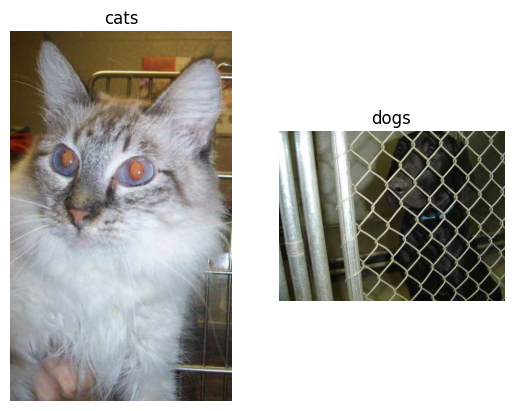

In [ ]:
plt.figure()
plt.subplot(1, 2, 1)
cat_img = view_random_image("cats_and_dogs_filtered/train/", "cats")
plt.subplot(1, 2, 2)
dog_img = view_random_image("cats_and_dogs_filtered/train/", "dogs")

In [ ]:
train_dir = "cats_and_dogs_filtered/train/"
test_dir = "cats_and_dogs_filtered/validation/"

In [ ]:
!nvidia-smi

Fri Feb 27 20:31:50 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.82.07              Driver Version: 580.82.07      CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   65C    P0             31W /   70W |    1181MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# Create a train and test data generater and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data frm directoriess
train_data = train_datagen.flow_from_directory(train_dir,
                                              target_size=(224, 224),
                                               class_mode="binary",
                                               batch_size=32)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Get a sample
images, labels = next(train_data) #get the "next" batch of image/label in the datsets
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)

63

In [ ]:
2000/32

62.5

In [ ]:
# Get the first two images
images[:2], images[0].shape

(array([[[[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         [[1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          ...,
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ],
          [1.        , 1.        , 1.        ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels
labels

array([0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0.],
      dtype=float32)

###3. Create a CNN model (start with a baseline)

In [ ]:
# Make the creating of our model a liittle easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.models import Sequential

In [ ]:
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           activation="relu",
           input_shape=(224, 224, 3),
           strides=1,
           padding="valid",
    ),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 152ms/step - accuracy: 0.5148 - loss: 3.8615 - val_accuracy: 0.5830 - val_loss: 0.6714
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 107ms/step - accuracy: 0.6531 - loss: 0.6417 - val_accuracy: 0.5850 - val_loss: 0.6811
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.8135 - loss: 0.5123 - val_accuracy: 0.6150 - val_loss: 0.6767
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 108ms/step - accuracy: 0.9049 - loss: 0.2939 - val_accuracy: 0.5620 - val_loss: 0.8999
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.9727 - loss: 0.1188 - val_accuracy: 0.5910 - val_loss: 1.0472


##Evaluate our model

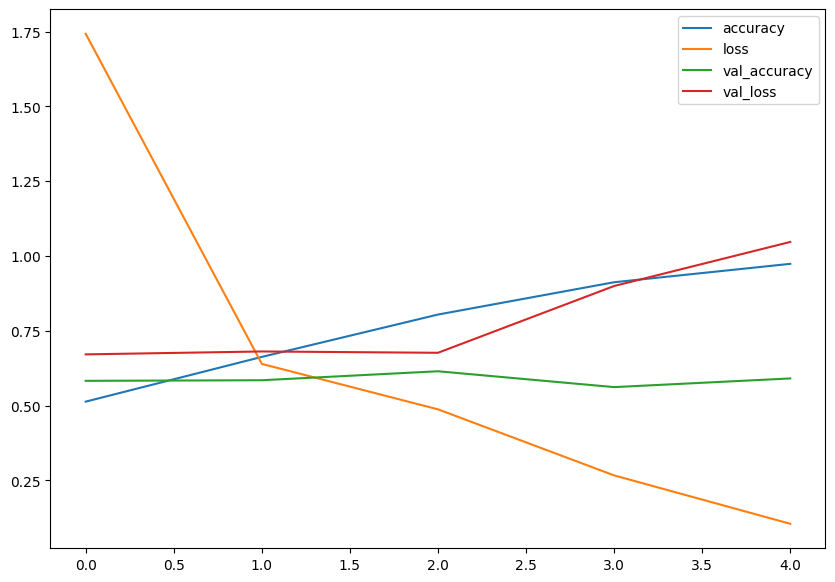

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [ ]:
# PLot the validation and traning curve seprately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics

  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend();

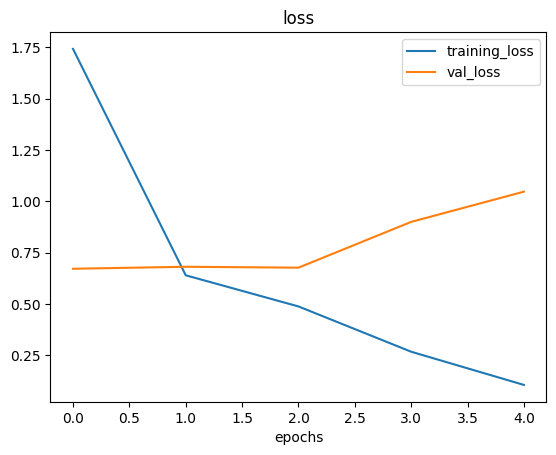

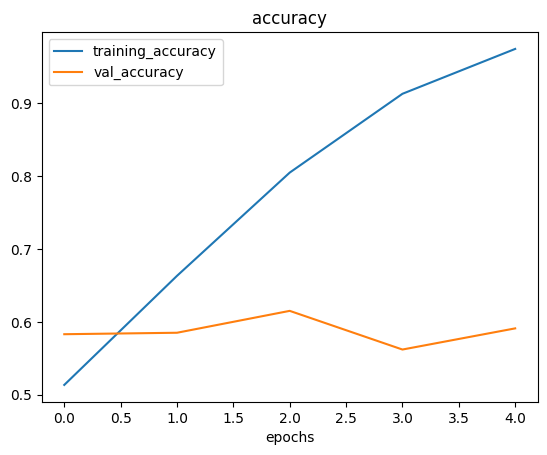

In [ ]:
# Checkout the loss and accuracy
plot_loss_curves(history_4)

### 6. Adjust the model parameters

In [ ]:
# Create the mdeol
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 148ms/step - accuracy: 0.5178 - loss: 0.6957 - val_accuracy: 0.5010 - val_loss: 0.6849
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 102ms/step - accuracy: 0.5799 - loss: 0.6699 - val_accuracy: 0.6050 - val_loss: 0.6475
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 101ms/step - accuracy: 0.6224 - loss: 0.6396 - val_accuracy: 0.5710 - val_loss: 0.6862
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 7s 103ms/step - accuracy: 0.6492 - loss: 0.6140 - val_accuracy: 0.6230 - val_loss: 0.6449
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.7162 - loss: 0.5562 - val_accuracy: 0.6560 - val_loss: 0.6100


In [ ]:
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

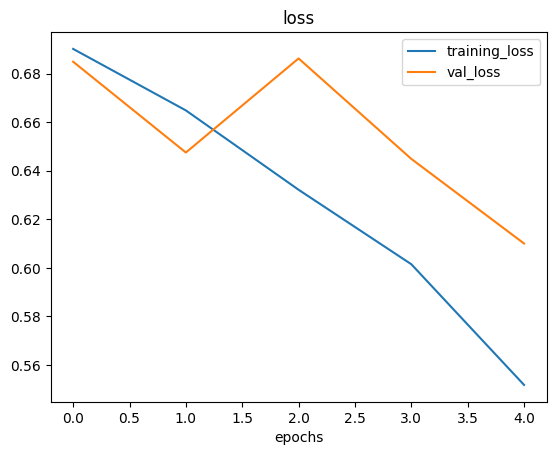

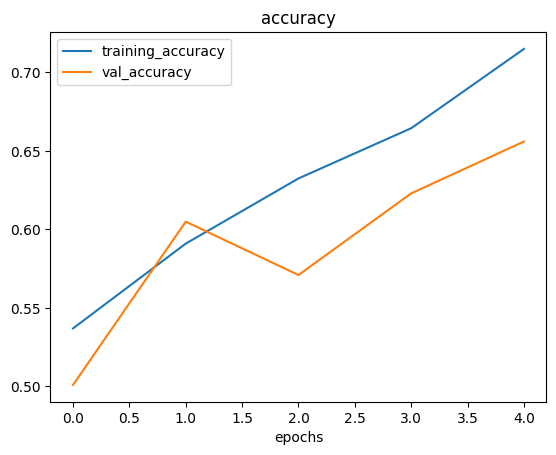

In [ ]:
#Plot loss curves
plot_loss_curves(history_5)

### Data Agumentation

In [ ]:
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)
# Create ImageDataGeneration without Data Agumentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# create ImageDataGenerator without Data Agumentation
test_datagen = ImageDataGenerator(rescale=1/255.)



from ast import pattern
>>>What is DataAgumentation?
>>>Data Agumentation is a technique to increase the dataset.
>>>Altering Our Traning tf.data
>>>Leading it To have more diversity and in turn allowing
our model to learning more generalizable patterns

In [ ]:
# Import Data and agumented it from traning directory
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 222),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   seed=42,
                                                                   shuffle=False)
# Import data but do not agument it from traning directory
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode="binary",
                                               seed=42,
                                               shuffle=False)
#Create non-agmented test Data
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="binary",
                                             seed=42,
                                             )



Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# Get some sample AAgumented Data
aug_images, aug_labels = next(train_data_augmented)

image, label = next(train_data)
len(images), len(labels)
len(aug_images), len(aug_labels)


(32, 32)

Show Image Number: 27
Original Image Shape: (224, 224, 3)
Augmented Image Shape: (224, 222, 3)


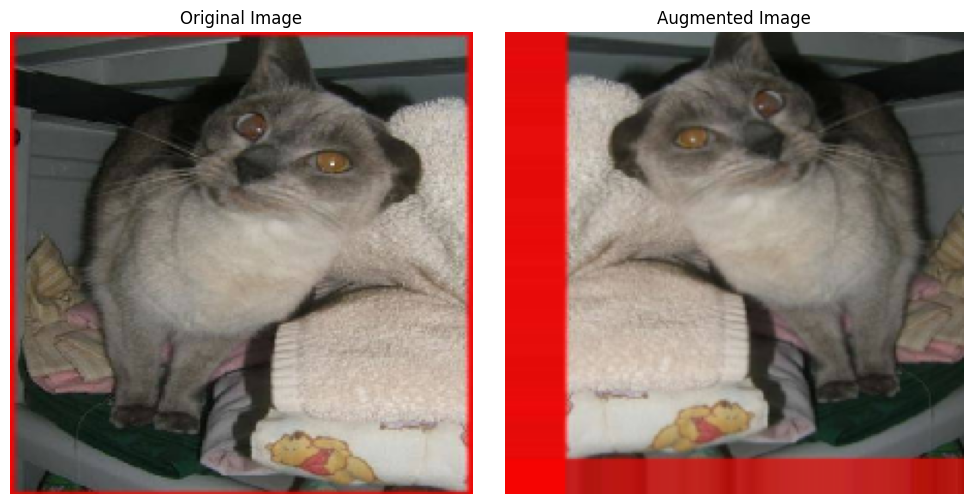

In [ ]:
import random

random_number = random.randint(0, 32)
print(f"Show Image Number: {random_number}")
print(f"Original Image Shape: {image[random_number].shape}")
print(f"Augmented Image Shape: {aug_images[random_number].shape}")

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # ✅ create subplots FIRST

axes[0].imshow(image[random_number])
axes[0].set_title("Original Image")
axes[0].axis("off")

axes[1].imshow(aug_images[random_number])
axes[1].set_title("Augmented Image")
axes[1].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Create a model (smae as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])


model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 35s 495ms/step - accuracy: 0.4150 - loss: 0.7270 - val_accuracy: 0.5000 - val_loss: 0.6879
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 475ms/step - accuracy: 0.4709 - loss: 0.6932 - val_accuracy: 0.5010 - val_loss: 0.6803
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 461ms/step - accuracy: 0.6004 - loss: 0.6836 - val_accuracy: 0.5590 - val_loss: 0.6921
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 458ms/step - accuracy: 0.4716 - loss: 0.6935 - val_accuracy: 0.5290 - val_loss: 0.6914
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 465ms/step - accuracy: 0.5256 - loss: 0.6926 - val_accuracy: 0.5590 - val_loss: 0.6892


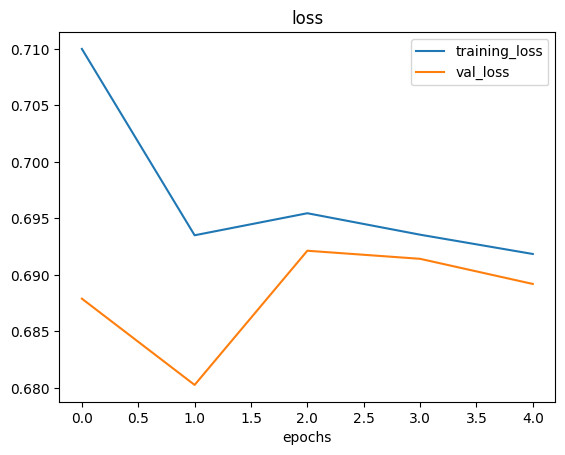

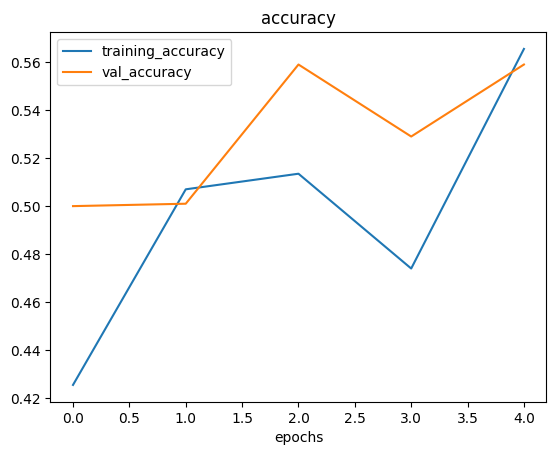

In [ ]:
#Check our models training curves
plot_loss_curves(history_6)

In [ ]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='binary', # Changed from 'categorical' to 'binary'
                                                                            shuffle=True)

Found 2000 images belonging to 2 classes.


In [ ]:
# Create a model (same as model_5 and model_6)
model_7 = Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),   # ← preferred approach
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=7,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 491ms/step - accuracy: 0.4914 - loss: 0.6929 - val_accuracy: 0.6330 - val_loss: 0.6746
Epoch 2/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 470ms/step - accuracy: 0.5712 - loss: 0.6805 - val_accuracy: 0.5720 - val_loss: 0.6744
Epoch 3/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 459ms/step - accuracy: 0.5650 - loss: 0.6762 - val_accuracy: 0.6250 - val_loss: 0.6370
Epoch 4/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 462ms/step - accuracy: 0.5848 - loss: 0.6623 - val_accuracy: 0.5500 - val_loss: 0.6844
Epoch 5/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 466ms/step - accuracy: 0.5845 - loss: 0.6539 - val_accuracy: 0.6600 - val_loss: 0.6184
Epoch 6/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 471ms/step - accuracy: 0.6071 - loss: 0.6409 - val_accuracy: 0.6280 - val_loss: 0.6282
Epoch 7/7
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 462ms/step - accuracy: 0.6324 - loss: 0.6323 - val_accuracy: 0.6830 - val_loss: 0.5863


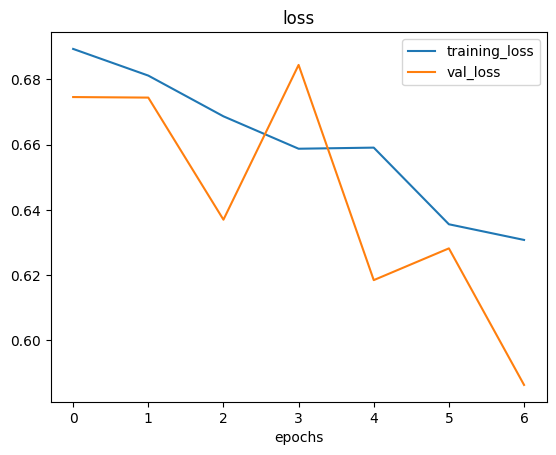

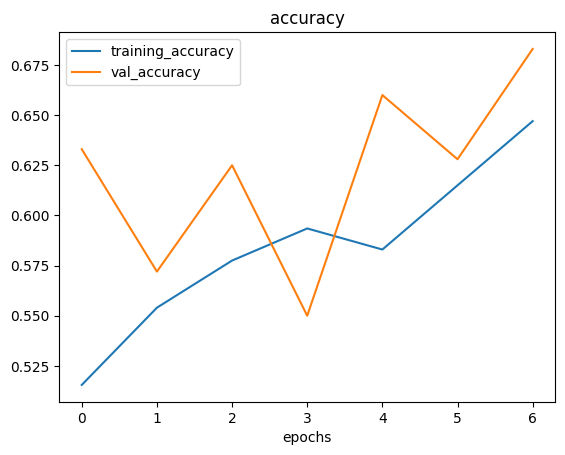

In [ ]:
# Plot the losss curves
plot_loss_curves(history_7)

In [ ]:
import torch

# Dynamically set the device to GPU (CUDA or MPS) if available, otherwise fallback to CPU
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available(): # For Apple Silicon GPUs (M1, M2, etc.)
    device = torch.device("mps")
else:
    device = torch.device("cpu")

print(f"Code running on device: {device}")


Code running on device: cuda


In [ ]:
###7 Repeat until satisfied

In [ ]:
import  matplotlib.image as mpimg
# Using a different, publicly accessible image URL
!wget -O 03-cat.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1200px-Cat03.jpg
cat = mpimg.imread("03-cat.jpg")

--2026-02-27 20:39:22--  https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/1200px-Cat03.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 215264 (210K) [image/jpeg]
Saving to: ‘03-cat.jpg’

03-cat.jpg          100%[===================>] 210.22K  --.-KB/s    in 0.05s   

2026-02-27 20:39:22 (4.56 MB/s) - ‘03-cat.jpg’ saved [215264/215264]



(np.float64(-0.5), np.float64(1199.5), np.float64(1197.5), np.float64(-0.5))

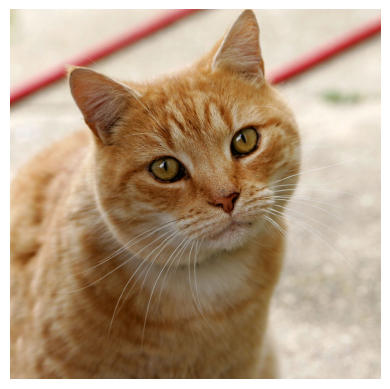

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(cat)
plt.axis(False)

In [ ]:
cat.shape

(1198, 1200, 3)

In [ ]:
expanded_cat = tf.expand_dims(cat, axis=0)
expanded_cat.shape

TensorShape([1, 1198, 1200, 3])

In [ ]:
import os # Added for path operations
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshapes it
  to (img_shape, img_shape,, color_channels)
  """
  # Get file extension
  _, ext = os.path.splitext(filename)
  ext = ext.lower()

  if ext == '.webp':
    # Use matplotlib.image.imread for .webp files
    img_np = mpimg.imread(filename)
    img = tf.convert_to_tensor(img_np, dtype=tf.float32)
    # If imread gives values in [0, 255] (uint8), then division by 255. is needed.
    if img.dtype == tf.uint8:
        img = tf.cast(img, dtype=tf.float32)
  else:
    # Read in the image using TensorFlow for other formats (JPEG, PNG, GIF, BMP)
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.cast(img, dtype=tf.float32) # Ensure float32 for resizing and division

  # Ensure 3 channels for consistency (if it was grayscale or had alpha from imread or decode_image)
  if img.shape[-1] == 4: # RGBA to RGB
      img = img[..., :3]
  elif img.shape[-1] == 1: # Grayscale to RGB
      img = tf.image.grayscale_to_rgb(img)

  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image (will be applied to both WebP and other formats)
  img = img/255.
  return img

In [ ]:
#Load and preprocess our ustom image
custom_image = load_and_prep_image("03-cat.jpg")
custom_image.shape

TensorShape([224, 224, 3])

In [ ]:
expanded_cat = tf.expand_dims(custom_image, axis=0)
expanded_cat.shape

TensorShape([1, 224, 224, 3])

In [ ]:
model_7.predict(expanded_cat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 758ms/step


array([[0.4537965]], dtype=float32)

In [ ]:
class_names

array(['cats', 'dogs'], dtype='<U4')

In [ ]:
# we can index predicts class by rounding  the prdiction probablity and indexing it on the class anmes
pred_class = class_names[int(tf.round(model_7.predict(expanded_cat)))]
pred_class

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


np.str_('cats')

In [ ]:
def pred_and_plot(model, filename, class_names):
  """
  Imprtes an image located at filename, makes a prediction with model and plots the image with the prediction
  """
  img = load_and_prep_image(filename)
  pred = model.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]
  #PLot the image and predicted image
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

In [ ]:
#Test our model on a custoom image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


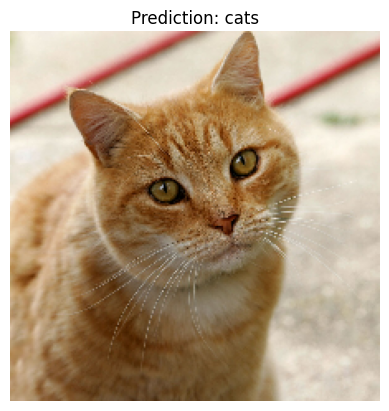

In [ ]:
pred_and_plot(model_7, "03-cat.jpg", class_names)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Base model layers: 238
Trainable variables: 0


Model: "model_8_feature_extraction"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_avg_pool                 │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_norm (BatchNormalization) │ (None, 1280)           │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_256 (Dense)               │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_128 (Dense)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,415,652 (16.84 MB)

 Trainable params: 363,521 (1.39 MB)

 Non-trainable params: 4,052,131 (15.46 MB)


PHASE 1: Feature Extraction (EfficientNetB0 frozen)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 854ms/step - accuracy: 0.8896 - loss: 0.2449
Epoch 1: val_accuracy improved from -inf to 0.99600, saving model to model_8_best.keras
63/63 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.8905 - loss: 0.2431 - val_accuracy: 0.9960 - val_loss: 0.0336 - learning_rate: 0.0010
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.9850 - loss: 0.0551
Epoch 2: val_accuracy did not improve from 0.99600
63/63 ━━━━━━━━━━━━━━━━━━━━ 30s 476ms/step - accuracy: 0.9850 - loss: 0.0551 - val_accuracy: 0.9910 - val_loss: 0.0227 - learning_rate: 0.0010
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step - accuracy: 0.9820 - loss: 0.0636
Epoch 3: val_accuracy did not improve from 0.99600
63/63 ━━━━━━━━━━━━━━━━━━━━ 31s 499ms/step - accuracy: 0.9820 - loss: 0.0633 - val_accuracy: 0.9950 - val_loss: 0.0163 - learning_rate: 0.0010
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 446ms/step - accuracy: 0.9868 - loss: 0.0500
Epoch 4: val_accuracy did not improve from

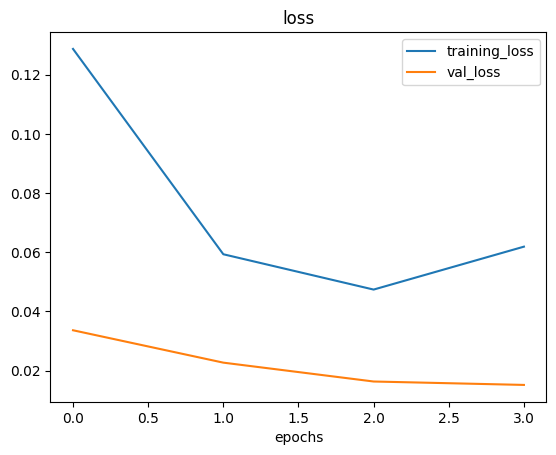

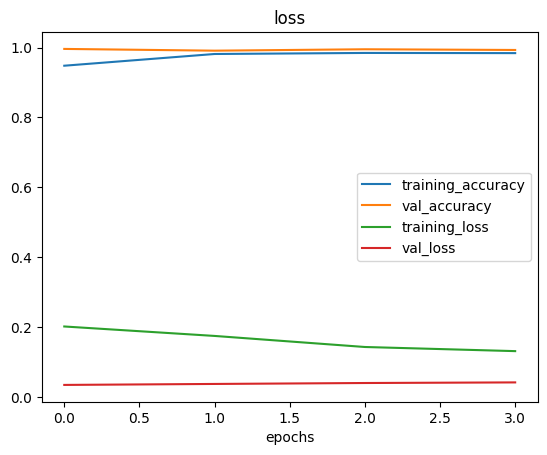

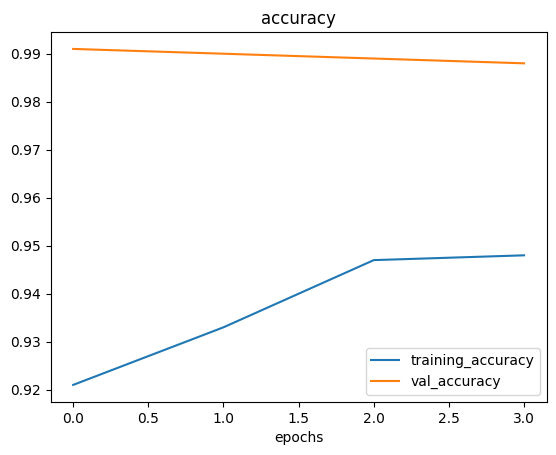

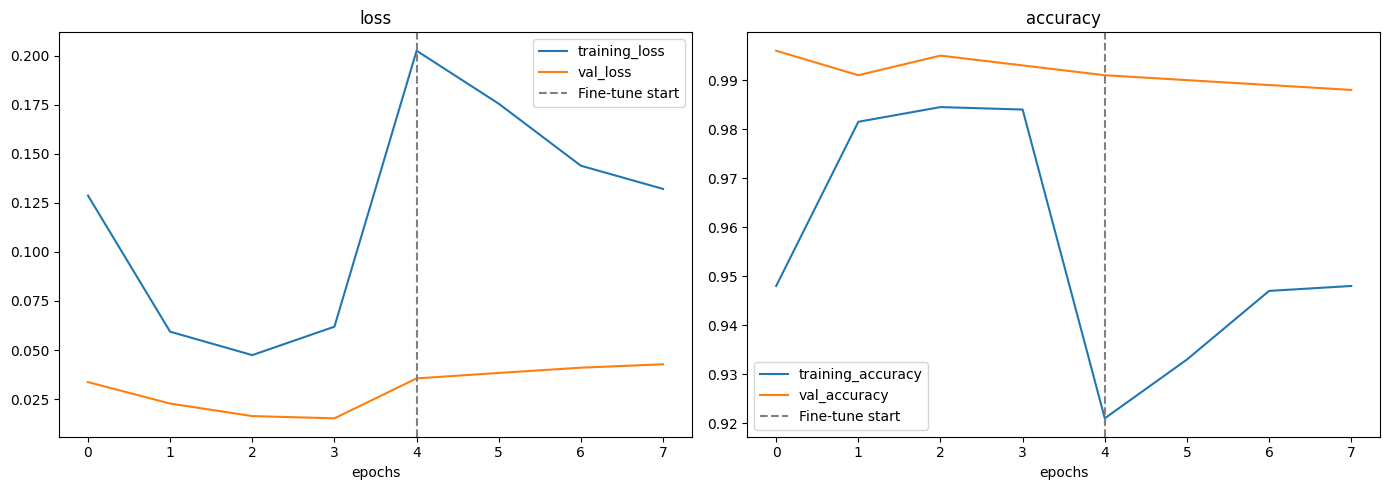

32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9903 - loss: 0.0385

✅ model_8 Final Test Accuracy: 99.10%
✅ model_8 Final Test Loss:     0.0355
1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


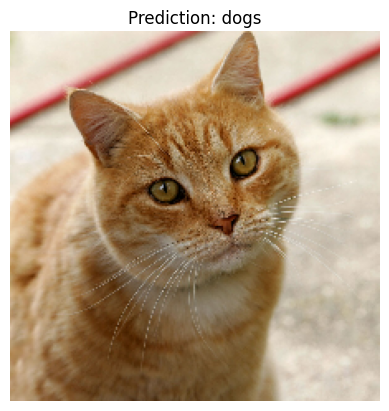

In [ ]:
# ============================================================
# MODEL 8 — Transfer Learning (Feature Extraction)
# Continuing from your notebook style
# ============================================================

import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, GlobalAveragePooling2D, Dropout, BatchNormalization, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

tf.random.set_seed(42)

# ─────────────────────────────────────────
# Step 1: Better Data Generators
# (Same dirs you already have: train_dir, test_dir)
# ─────────────────────────────────────────

# Note: EfficientNetB0 has built-in preprocessing,
# so NO rescale=1/255 needed!
train_datagen_8 = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

test_datagen_8 = ImageDataGenerator()  # No augmentation on test data

train_data_8 = train_datagen_8.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=True,          # ← Always shuffle training data!
    seed=42
)

test_data_8 = test_datagen_8.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="binary",
    shuffle=False,
    seed=42
)

# ─────────────────────────────────────────
# Step 2: Load EfficientNetB0 base (pre-trained on ImageNet)
# ─────────────────────────────────────────

base_model = EfficientNetB0(
    include_top=False,        # Remove ImageNet classification head
    weights="imagenet",       # Use pre-trained weights!
    input_shape=(224, 224, 3)
)

# Freeze ALL base layers (we only train our new head for now)
base_model.trainable = False

print(f"Base model layers: {len(base_model.layers)}")
print(f"Trainable variables: {len(base_model.trainable_variables)}")

# ─────────────────────────────────────────
# Step 3: Build model_8 on top of base
# ─────────────────────────────────────────

inputs = tf.keras.Input(shape=(224, 224, 3), name="input_layer")
x = base_model(inputs, training=False)       # training=False → keeps BatchNorm frozen
x = GlobalAveragePooling2D(name="global_avg_pool")(x)
x = BatchNormalization(name="batch_norm")(x)
x = Dense(256, activation="relu", name="dense_256")(x)
x = Dropout(0.5, name="dropout_1")(x)
x = Dense(128, activation="relu", name="dense_128")(x)
x = Dropout(0.3, name="dropout_2")(x)
outputs = Dense(1, activation="sigmoid", name="output")(x)

model_8 = tf.keras.Model(inputs, outputs, name="model_8_feature_extraction")

model_8.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=1e-3),
    metrics=["accuracy"]
)

model_8.summary()

# ─────────────────────────────────────────
# Step 4: Callbacks (same pattern as your notebook)
# ─────────────────────────────────────────

callbacks_8 = [
    EarlyStopping(
        monitor="val_accuracy",
        patience=3,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor="val_loss",
        factor=0.5,
        patience=2,
        min_lr=1e-7,
        verbose=1
    ),
    ModelCheckpoint(
        "model_8_best.keras",
        monitor="val_accuracy",
        save_best_only=True,
        verbose=1
    )
]

# ─────────────────────────────────────────
# Step 5: Phase 1 — Feature Extraction
#          (base frozen, only train the head)
#          Expected: ~85–92% val accuracy
# ─────────────────────────────────────────

print("\n" + "="*55)
print("PHASE 1: Feature Extraction (EfficientNetB0 frozen)")
print("="*55)

history_8_phase1 = model_8.fit(
    train_data_8,
    epochs=10,
    steps_per_epoch=len(train_data_8),
    validation_data=test_data_8,
    validation_steps=len(test_data_8),
    callbacks=callbacks_8
)

# Plot phase 1 curves (using your existing function!)
plot_loss_curves(history_8_phase1)

# ─────────────────────────────────────────
# Step 6: Phase 2 — Fine-Tuning
#          Unfreeze top 30 layers of base model
#          Use a MUCH smaller LR to avoid destroying weights
#          Expected: ~95–100% val accuracy
# ─────────────────────────────────────────

print("\n" + "="*55)
print("PHASE 2: Fine-Tuning (top 30 layers unfrozen)")
print("="*55)

# Unfreeze the base model
base_model.trainable = True

# Re-freeze all layers EXCEPT the last 30
for layer in base_model.layers[:-30]:
    layer.trainable = False

print(f"Total layers in base: {len(base_model.layers)}")
print(f"Trainable layers now: {sum(1 for l in base_model.layers if l.trainable)}")

# CRITICAL: Recompile with 100x smaller learning rate
model_8.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=1e-5),   # Very small LR for fine-tuning!
    metrics=["accuracy"]
)

history_8_phase2 = model_8.fit(
    train_data_8,
    epochs=15,
    steps_per_epoch=len(train_data_8),
    validation_data=test_data_8,
    validation_steps=len(test_data_8),
    callbacks=callbacks_8
)

# Plot phase 2 curves
plot_loss_curves(history_8_phase2)

# ─────────────────────────────────────────
# Step 7: Plot COMBINED training history
# (both phases together, like your plot_loss_curves style)
# ─────────────────────────────────────────

def plot_combined_history(h1, h2):
    """Combines two training histories and plots them together"""
    acc      = h1.history["accuracy"]     + h2.history["accuracy"]
    val_acc  = h1.history["val_accuracy"] + h2.history["val_accuracy"]
    loss     = h1.history["loss"]         + h2.history["loss"]
    val_loss = h1.history["val_loss"]     + h2.history["val_loss"]
    epochs   = range(len(acc))
    split    = len(h1.history["accuracy"])  # Where fine-tuning starts

    plt.figure(figsize=(14, 5))

    # --- Loss ---
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss,     label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.axvline(x=split, color="gray", linestyle="--", label="Fine-tune start")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # --- Accuracy ---
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc,     label="training_accuracy")
    plt.plot(epochs, val_acc, label="val_accuracy")
    plt.axvline(x=split, color="gray", linestyle="--", label="Fine-tune start")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_combined_history(history_8_phase1, history_8_phase2)

# ─────────────────────────────────────────
# Step 8: Final Evaluation
# ─────────────────────────────────────────

loss_8, acc_8 = model_8.evaluate(test_data_8)
print(f"\n✅ model_8 Final Test Accuracy: {acc_8 * 100:.2f}%")
print(f"✅ model_8 Final Test Loss:     {loss_8:.4f}")

# ─────────────────────────────────────────
# Step 9: Predict on custom image
# (using your existing pred_and_plot function!)
# ─────────────────────────────────────────

# Test on your cat image
pred_and_plot(model_8, "03-cat.jpg", class_names)

--2026-02-27 20:46:23--  https://images.litter-robot.com/media/wysiwyg/abyssinian-cat7.png
Resolving images.litter-robot.com (images.litter-robot.com)... 100.51.214.90, 18.235.6.33
Connecting to images.litter-robot.com (images.litter-robot.com)|100.51.214.90|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 333455 (326K) [image/png]
Saving to: ‘custom_test_image.jpg’

custom_test_image.j 100%[===================>] 325.64K  --.-KB/s    in 0.05s   

2026-02-27 20:46:23 (5.81 MB/s) - ‘custom_test_image.jpg’ saved [333455/333455]

✅ Image downloaded to: custom_test_image.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

🔍 Prediction : CATS
📊 Confidence : 99.90%
   (Raw prob  : 0.0010  → 0=cats, 1=dogs)


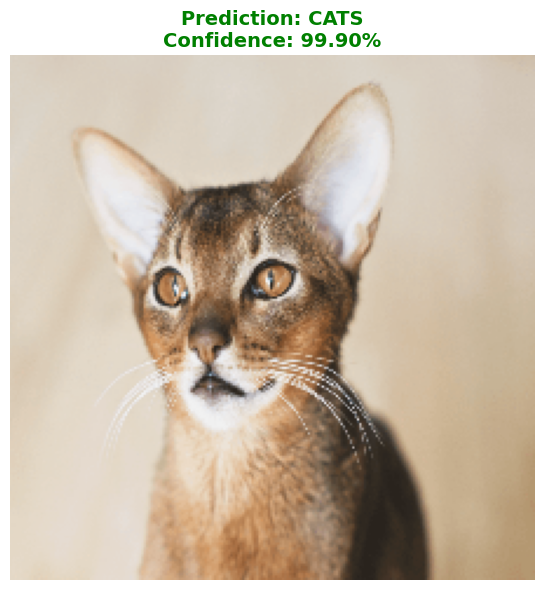

In [ ]:
# ─────────────────────────────────────────
# Predict & Plot on a custom URL image
# ─────────────────────────────────────────

import requests # Keep requests import, though not used for download below.
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import numpy as np

# Step 1: Download the image from URL
# Using a different, publicly accessible image URL (e.g., a dog image from Wikimedia Commons)
url = "https://images.litter-robot.com/media/wysiwyg/abyssinian-cat7.png"
img_path = "custom_test_image.jpg"

# Use !wget for a more reliable download
!wget --no-check-certificate {url} -O {img_path}

print(f"✅ Image downloaded to: {img_path}")

# Step 2: Load and prep the image
# (using your existing load_and_prep_image function — NO rescale since EfficientNetB0 handles it)
def load_and_prep_image_efficientnet(filename, img_shape=224):
    """
    Reads image, resizes to (img_shape, img_shape, 3).
    NO manual rescaling — EfficientNetB0 has built-in preprocessing.
    """
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img, channels=3)   # force 3 channels (RGB)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # NO img/255. here — EfficientNetB0 preprocesses internally
    return img

# Step 3: Predict
custom_image = load_and_prep_image_efficientnet(img_path)
img_expanded = tf.expand_dims(custom_image, axis=0)   # shape: (1, 224, 224, 3)

pred_prob = model_8.predict(img_expanded)[0][0]
pred_class = class_names[int(tf.round(pred_prob))]
confidence = pred_prob if pred_prob > 0.5 else 1 - pred_prob

print(f"\n🔍 Prediction : {pred_class.upper()}")
print(f"📊 Confidence : {confidence * 100:.2f}%")
print(f"   (Raw prob  : {pred_prob:.4f}  → 0=cats, 1=dogs)")

# Step 4: Plot — matching your notebook's pred_and_plot style
plt.figure(figsize=(8, 6))
plt.imshow(custom_image / 255.)          # divide only for display
plt.title(
    f"Prediction: {pred_class.upper()}\nConfidence: {confidence * 100:.2f}%",
    fontsize=14,
    fontweight="bold",
    color="green" if confidence > 0.85 else "orange"
)
plt.axis(False)
plt.tight_layout()
plt.show()

In [ ]:
# Install kagglehub (run this once in your Colab notebook)
!pip install -q kagglehub

import kagglehub
import os

# 1. Download the dataset using kagglehub (handles downloading and extracting automatically)
print("Downloading dataset...")
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

# 2. Define the directory paths
# This specific dataset extracts into an 'animals/animals' nested folder structure
base_dir = os.path.join(path, 'animals', 'animals')

# Fallback just in case the extraction path varies slightly
if not os.path.exists(base_dir):
    base_dir = path

print(f"\nDataset extracted to: {base_dir}")

# 3. List the classes (the 90 animal folders)
classes = sorted(os.listdir(base_dir))

print(f"Total classes found: {len(classes)}")
print("First 10 classes inside the folder:", classes[:10])

Using Colab cache for faster access to the 'animal-image-dataset-90-different-animals' dataset.

Dataset extracted to: /kaggle/input/animal-image-dataset-90-different-animals/animals/animals
Total classes found: 90
First 10 classes inside the folder: ['antelope', 'badger', 'bat', 'bear', 'bee', 'beetle', 'bison', 'boar', 'butterfly', 'cat']


In [ ]:
import os
for dirpath, dirnames, filenames in os.walk(base_dir):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 90 directories and 0 images in '/kaggle/input/animal-image-dataset-90-different-animals/animals/animals'.
There are 0 directories and 60 images in '/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/beetle'.
There are 0 directories and 60 images in '/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/parrot'.
There are 0 directories and 60 images in '/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/fox'.
There are 0 directories and 60 images in '/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/wolf'.
There are 0 directories and 60 images in '/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/hedgehog'.
There are 0 directories and 60 images in '/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/turtle'.
There are 0 directories and 60 images in '/kaggle/input/animal-image-dataset-90-different-animals/animals/animals/snake'.
There are 0 directories and

In [ ]:
import os
import shutil
import random

# 1. Define where you want your new split folders to live
split_dataset_dir = '/content/animal_dataset_split'
train_dir = os.path.join(split_dataset_dir, 'train')
test_dir = os.path.join(split_dataset_dir, 'test')

# 2. Set your split ratio (80% for training, 20% for testing)
split_ratio = 0.8

# 3. Create the empty train and test directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Get all the 90 animal class folders
classes = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

print("Splitting images into train and test folders...")

# 4. Loop through each animal folder and split the files
for animal_class in classes:
    class_path = os.path.join(base_dir, animal_class)

    # Create the specific animal folders inside train and test
    os.makedirs(os.path.join(train_dir, animal_class), exist_ok=True)
    os.makedirs(os.path.join(test_dir, animal_class), exist_ok=True)

    # Get all images for this animal and shuffle them
    images = os.listdir(class_path)
    random.shuffle(images)

    # Calculate how many images go to training
    split_index = int(len(images) * split_ratio)
    train_images = images[:split_index]
    test_images = images[split_index:]

    # Copy images to their new train destination
    for img in train_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(train_dir, animal_class, img)
        shutil.copy(src, dst)

    # Copy images to their new test destination
    for img in test_images:
        src = os.path.join(class_path, img)
        dst = os.path.join(test_dir, animal_class, img)
        shutil.copy(src, dst)

print(f"Done! Your split dataset is ready at: {split_dataset_dir}")

Splitting images into train and test folders...
Done! Your split dataset is ready at: /content/animal_dataset_split


In [ ]:
import kagglehub
import os
import shutil
import random

# 1. Download the dataset using kagglehub
print("Downloading dataset...")
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

# The downloaded dataset is usually nested inside an 'animals/animals' folder
original_data_dir = os.path.join(path, 'animals', 'animals')
if not os.path.exists(original_data_dir):
    original_data_dir = path # Fallback just in case

# 2. Define your target train_dir and test_dir variables
base_dir = '/content/animal_dataset_split'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Create the empty base directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# 3. Set your split ratio (80% train, 20% test)
split_ratio = 0.8

print("Splitting images into train and test folders. This might take a moment...")

# Get all the 90 animal class folders
classes = [d for d in os.listdir(original_data_dir) if os.path.isdir(os.path.join(original_data_dir, d))]

# 4. Loop through each animal folder and distribute the files
for animal_class in classes:
    class_path = os.path.join(original_data_dir, animal_class)

    # Create the specific animal folders inside your new train_dir and test_dir
    train_class_dir = os.path.join(train_dir, animal_class)
    test_class_dir = os.path.join(test_dir, animal_class)

    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # Get all images for this animal and shuffle them
    images = os.listdir(class_path)
    random.shuffle(images)

    # Calculate the split index
    split_index = int(len(images) * split_ratio)
    train_images = images[:split_index]
    test_images = images[split_index:]

    # Copy images to the train_dir
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_class_dir, img))

    # Copy images to the test_dir
    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_class_dir, img))

print("\nSuccess! Dataset successfully split.")
print(f"Training directory ready at: {train_dir}")
print(f"Testing directory ready at: {test_dir}")

Using Colab cache for faster access to the 'animal-image-dataset-90-different-animals' dataset.
Splitting images into train and test folders. This might take a moment...

Success! Dataset successfully split.
Training directory ready at: /content/animal_dataset_split/train
Testing directory ready at: /content/animal_dataset_split/test


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['antelope' 'badger' 'bat' 'bear' 'bee' 'beetle' 'bison' 'boar'
 'butterfly' 'cat' 'caterpillar' 'chimpanzee' 'cockroach' 'cow' 'coyote'
 'crab' 'crow' 'deer' 'dog' 'dolphin' 'donkey' 'dragonfly' 'duck' 'eagle'
 'elephant' 'flamingo' 'fly' 'fox' 'goat' 'goldfish' 'goose' 'gorilla'
 'grasshopper' 'hamster' 'hare' 'hedgehog' 'hippopotamus' 'hornbill'
 'horse' 'hummingbird' 'hyena' 'jellyfish' 'kangaroo' 'koala' 'ladybugs'
 'leopard' 'lion' 'lizard' 'lobster' 'mosquito' 'moth' 'mouse' 'octopus'
 'okapi' 'orangutan' 'otter' 'owl' 'ox' 'oyster' 'panda' 'parrot'
 'pelecaniformes' 'penguin' 'pig' 'pigeon' 'porcupine' 'possum' 'raccoon'
 'rat' 'reindeer' 'rhinoceros' 'sandpiper' 'seahorse' 'seal' 'shark'
 'sheep' 'snake' 'sparrow' 'squid' 'squirrel' 'starfish' 'swan' 'tiger'
 'turkey' 'turtle' 'whale' 'wolf' 'wombat' 'woodpecker' 'zebra']


/content/animal_dataset_split/train/goose
['5ed85f3060.jpg']
Image shape: (720, 736, 3)


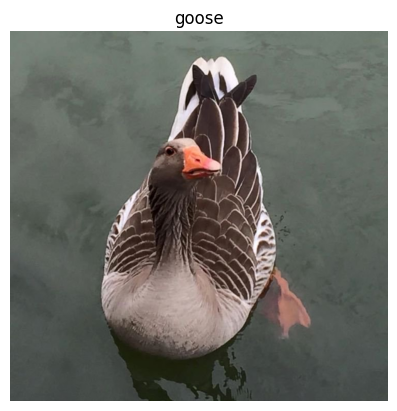

In [ ]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

###2. Preprocess our data(prepare it for model)

###Prepare the data(prepare it for model)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


#Load data in directories and turn into  batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               seed=42,
                                               shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 5180 images belonging to 90 classes.
Found 1940 images belonging to 90 classes.


## 3. Create a model(start with base line)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


In [ ]:
tf.random.set_seed(42)
model_9 = Sequential([
    Conv2D(10, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    Conv2D(10, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(10, (3, 3), activation='relu'),
    Conv2D(10, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(len(class_names), activation='softmax') # Changed from 10 to len(class_names) (90 classes)
])

# Compile our model
model_9.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

#Fit the model
history_9 = model_9.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 83s 476ms/step - accuracy: 0.0174 - loss: 4.5160 - val_accuracy: 0.1072 - val_loss: 4.1916
Epoch 2/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 67s 415ms/step - accuracy: 0.1963 - loss: 3.6325 - val_accuracy: 0.8036 - val_loss: 1.1136
Epoch 3/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 49s 300ms/step - accuracy: 0.8934 - loss: 0.5264 - val_accuracy: 0.9232 - val_loss: 0.6106
Epoch 4/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 54s 329ms/step - accuracy: 0.9951 - loss: 0.0426 - val_accuracy: 0.9232 - val_loss: 0.7805
Epoch 5/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 44s 271ms/step - accuracy: 0.9975 - loss: 0.0191 - val_accuracy: 0.9309 - val_loss: 0.7710


In [ ]:
model_9.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 90)             │     2,528,190 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,593,602 (28.97 MB)

 Trainable params: 2,531,200 (9.66 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,062,402 (19.31 MB)

### 5. Evaluate the model

In [ ]:
model_9.evaluate(test_data)

61/61 ━━━━━━━━━━━━━━━━━━━━ 11s 181ms/step - accuracy: 0.9330 - loss: 0.7406


[0.7710144519805908, 0.9309278130531311]

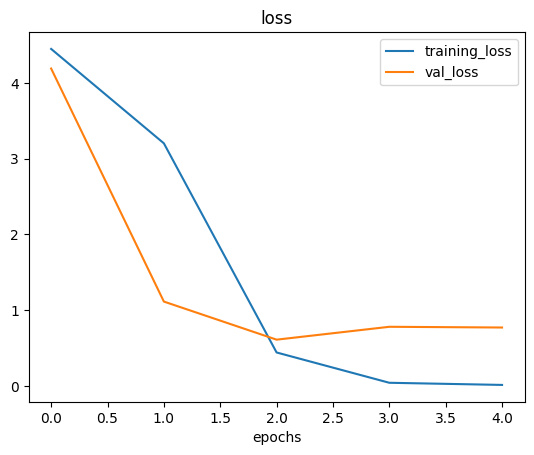

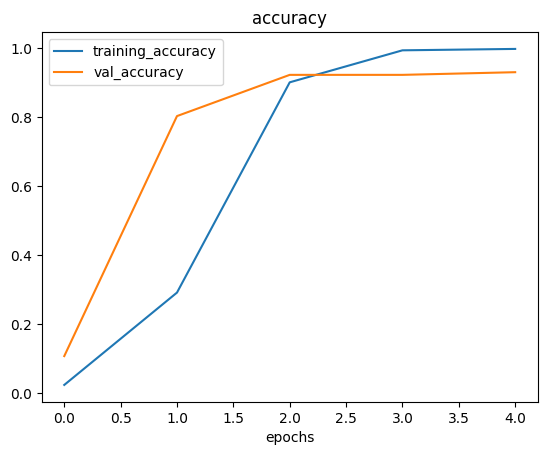

In [ ]:
plot_loss_curves(history=history_9)

In [ ]:
tf.random.set_seed(42)

model_10 = Sequential([
    Conv2D(10, 3,activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation="softmax")
])


model_10.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))


Epoch 1/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 51s 300ms/step - accuracy: 0.0445 - loss: 4.5080 - val_accuracy: 0.4325 - val_loss: 3.1289
Epoch 2/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 45s 279ms/step - accuracy: 0.4878 - loss: 2.4443 - val_accuracy: 0.8443 - val_loss: 0.9284
Epoch 3/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 44s 271ms/step - accuracy: 0.9265 - loss: 0.4593 - val_accuracy: 0.9268 - val_loss: 0.4987
Epoch 4/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 42s 258ms/step - accuracy: 0.9934 - loss: 0.0702 - val_accuracy: 0.9320 - val_loss: 0.4827
Epoch 5/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 42s 260ms/step - accuracy: 0.9987 - loss: 0.0201 - val_accuracy: 0.9325 - val_loss: 0.4924


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 640ms/step


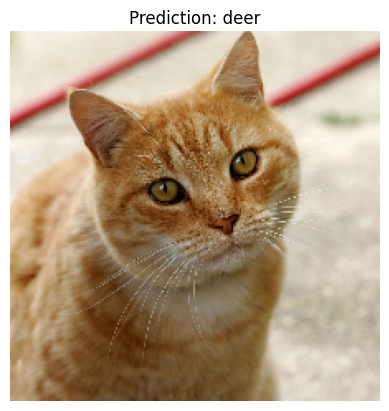

In [ ]:
import matplotlib.pyplot as plt

def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction with model, and plots the image with the prediction.
  Handles both binary and multi-class classification models by checking the model's output shape.
  """
  img = load_and_prep_image(filename)
  img_expanded = tf.expand_dims(img, axis=0) # Add batch dimension

  pred_probs = model.predict(img_expanded)

  # Determine if it's binary or multi-class classification
  if model.output_shape[-1] == 1: # Binary classification (e.g., sigmoid output)
    pred_value = tf.round(pred_probs)[0][0] # Get the rounded prediction (0 or 1) as a scalar
    pred_class = class_names[int(pred_value.numpy())]
  else: # Multi-class classification (e.g., softmax output)
    pred_class_index = tf.argmax(pred_probs, axis=1)[0].numpy() # Get the index of the highest probability
    pred_class = class_names[pred_class_index]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

pred_and_plot(model_9, "03-cat.jpg", class_names)

In [ ]:
array = np.array([[12, 34, 45],
                    [23, 45, 67,],
                     [12, 45, 67]])

In [ ]:
array

array([[12, 34, 45],
       [23, 45, 67],
       [12, 45, 67]])

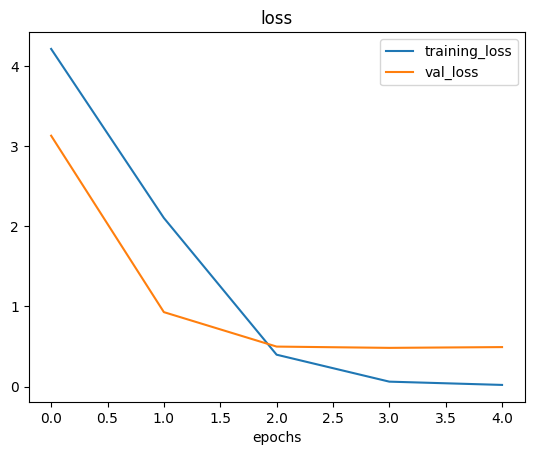

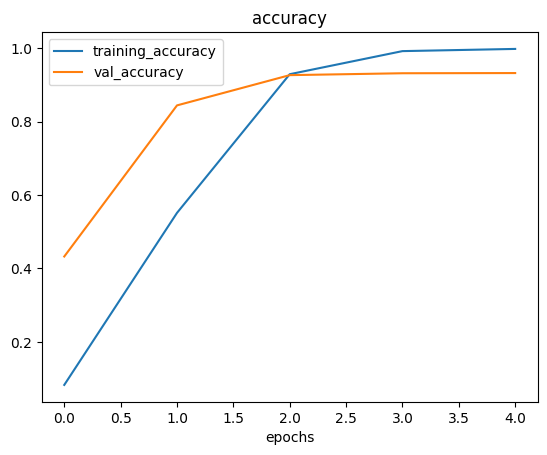

In [ ]:
plot_loss_curves(history_10)

# How about we try  and simplify the model

In [ ]:
model_11 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation="softmax") # Corrected to match the number of classes
])

model_11.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_11.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 29160)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │       291,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,800 (1.12 MB)

 Trainable params: 292,800 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fit the model with 2x cov
history_11 = model_11.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))


Epoch 1/5


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 90), output.shape=(None, 10)

In [ ]:
#Fit the model with 2x cov
history_11 = model_11.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 44s 259ms/step - accuracy: 0.0332 - loss: 4.5070 - val_accuracy: 0.3351 - val_loss: 3.3422
Epoch 2/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 41s 252ms/step - accuracy: 0.4852 - loss: 2.5476 - val_accuracy: 0.8469 - val_loss: 0.9799
Epoch 3/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 41s 251ms/step - accuracy: 0.9068 - loss: 0.5144 - val_accuracy: 0.9149 - val_loss: 0.5874
Epoch 4/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 50s 310ms/step - accuracy: 0.9854 - loss: 0.1090 - val_accuracy: 0.9273 - val_loss: 0.5449
Epoch 5/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 45s 278ms/step - accuracy: 0.9984 - loss: 0.0252 - val_accuracy: 0.9299 - val_loss: 0.5663


In [ ]:
model_11.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 29160)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 90)             │     2,624,490 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,625,680 (10.02 MB)

 Trainable params: 2,625,680 (10.02 MB)

 Non-trainable params: 0 (0.00 B)

#try to Reduce under fitting using data augmenetation


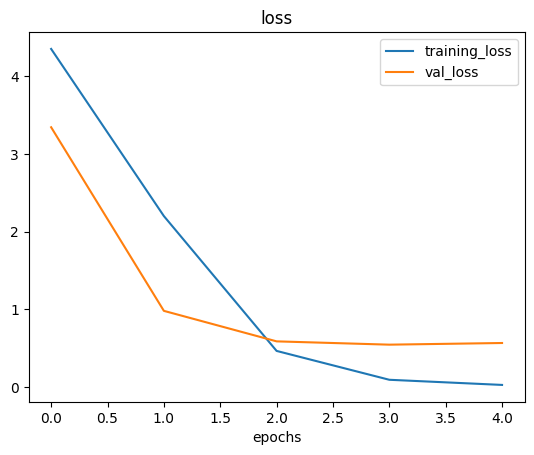

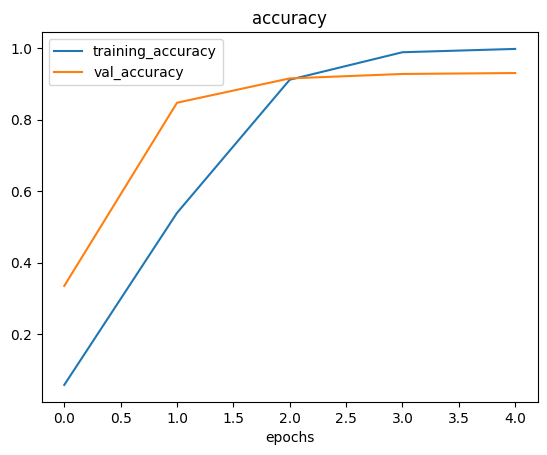

In [ ]:
plot_loss_curves(history_11)

In [ ]:
train_datagen_agumented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_agumented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                                                   seed=42,
)

Found 5180 images belonging to 90 classes.


In [ ]:
model_12 =tf.keras.models.clone_model(model_9)


#compile the model
model_12.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])
history_12 = model_12.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 101s 595ms/step - accuracy: 0.0142 - loss: 4.5157 - val_accuracy: 0.0330 - val_loss: 4.3113
Epoch 2/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 95s 585ms/step - accuracy: 0.0421 - loss: 4.2834 - val_accuracy: 0.0639 - val_loss: 4.0892
Epoch 3/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 95s 588ms/step - accuracy: 0.0909 - loss: 4.0175 - val_accuracy: 0.1144 - val_loss: 3.7877
Epoch 4/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 93s 570ms/step - accuracy: 0.1048 - loss: 3.8370 - val_accuracy: 0.1381 - val_loss: 3.6903
Epoch 5/5
162/162 ━━━━━━━━━━━━━━━━━━━━ 93s 577ms/step - accuracy: 0.1436 - loss: 3.6867 - val_accuracy: 0.1407 - val_loss: 3.8144


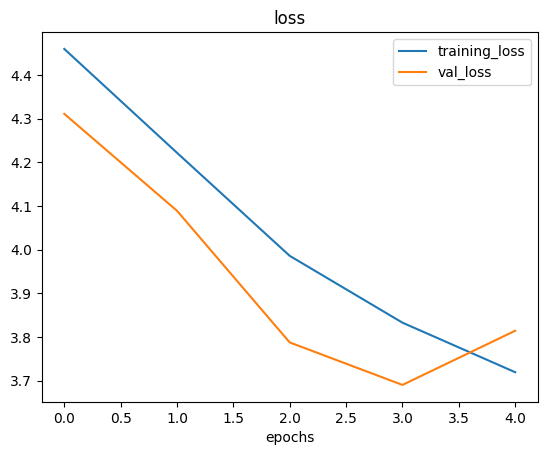

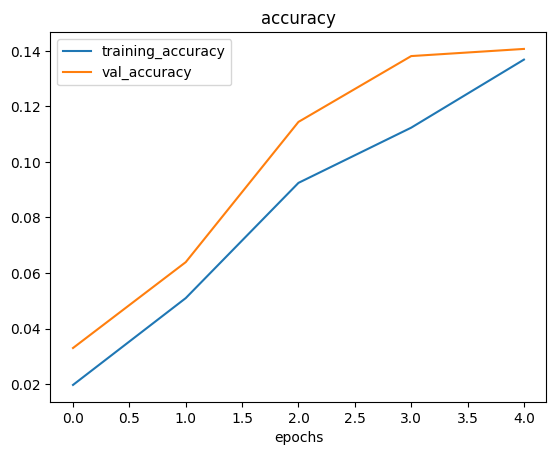

In [ ]:
plot_loss_curves(history_12)

### 7. Repeat until satisfied

In [ ]:
!wget -O dfly.jpg https://upload.wikimedia.org/wikipedia/commons/thumb/a/a6/020_The_lion_king_Snyggve_in_the_Serengeti_National_Park_Photo_by_Giles_Laurent.jpg/960px-020_The_lion_king_Snyggve_in_the_Serengeti_National_Park_Photo_by_Giles_Laurent.jpg
dfly = mpimg.imread("dfly.jpg")

--2026-02-27 23:20:36--  https://upload.wikimedia.org/wikipedia/commons/thumb/a/a6/020_The_lion_king_Snyggve_in_the_Serengeti_National_Park_Photo_by_Giles_Laurent.jpg/960px-020_The_lion_king_Snyggve_in_the_Serengeti_National_Park_Photo_by_Giles_Laurent.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162096 (158K) [image/jpeg]
Saving to: ‘dfly.jpg’

dfly.jpg            100%[===================>] 158.30K  --.-KB/s    in 0.04s   

2026-02-27 23:20:36 (4.10 MB/s) - ‘dfly.jpg’ saved [162096/162096]



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


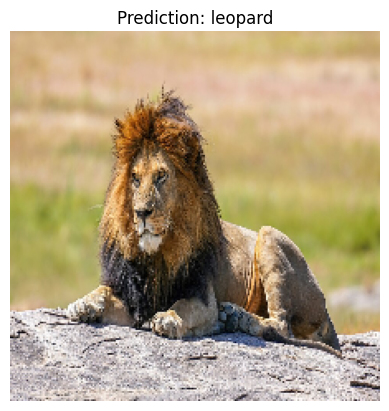

In [ ]:
pred_and_plot(model_12, "dfly.jpg", class_names)